# Import library


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print("Libraries imported")

# Lincoln edit
import tensorflow as tf
import keras
from keras import Model, layers

Libraries imported


2024-04-30 10:47:32.865658: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 10:47:32.865787: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 10:47:33.015087: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data= pd.read_csv("/kaggle/input/parkinsons-data-set/parkinsons.data")
data.head(5)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
data.shape

(195, 24)

In [6]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Exploratory Data Analysis(EDA)

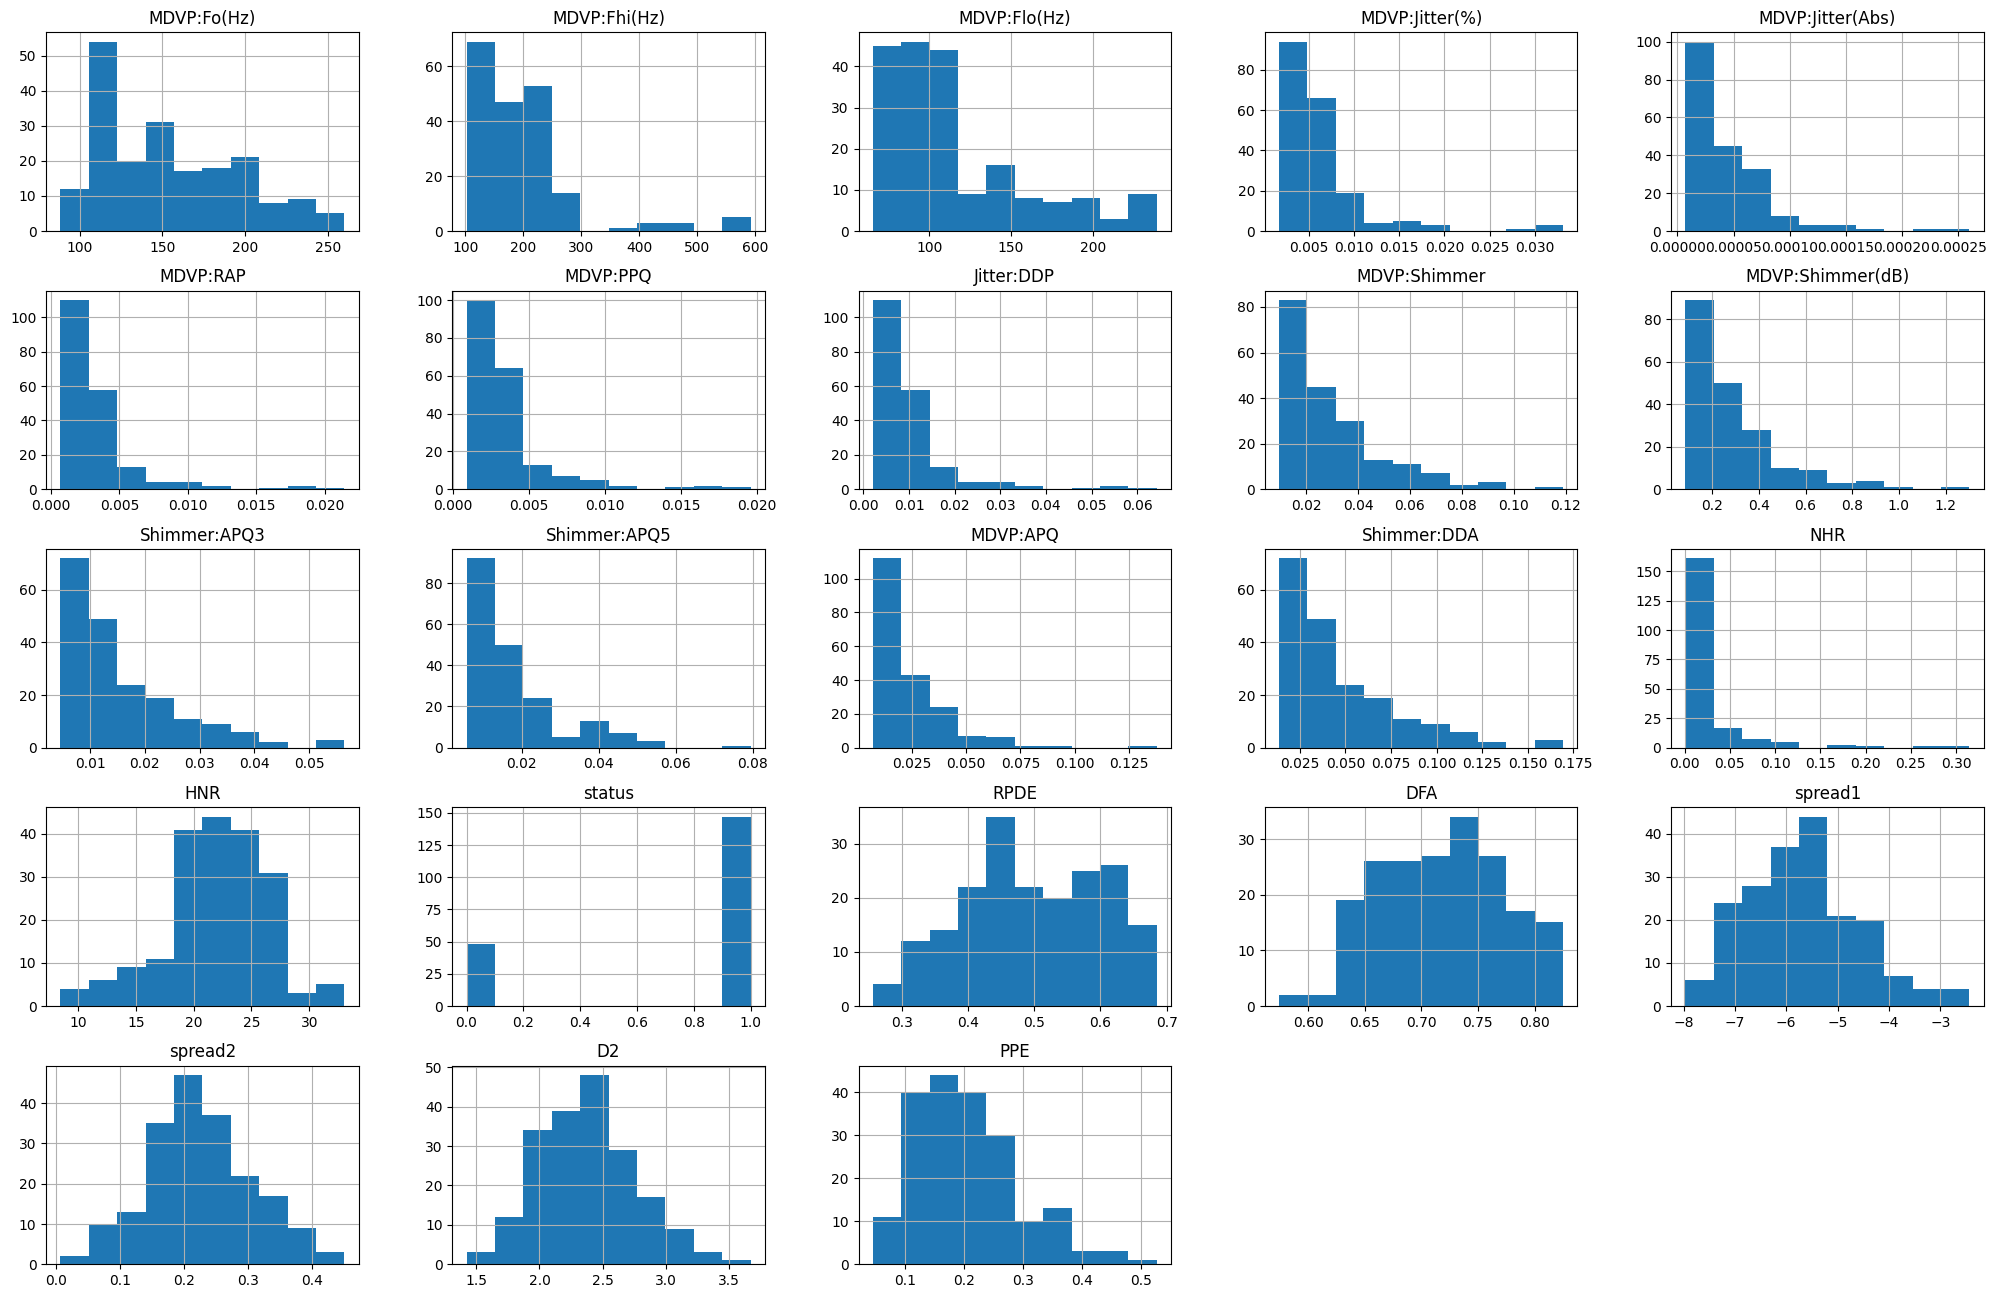

In [8]:
# Plotting the histogram of dataset

data.hist(figsize=(25,16))
plt.show()



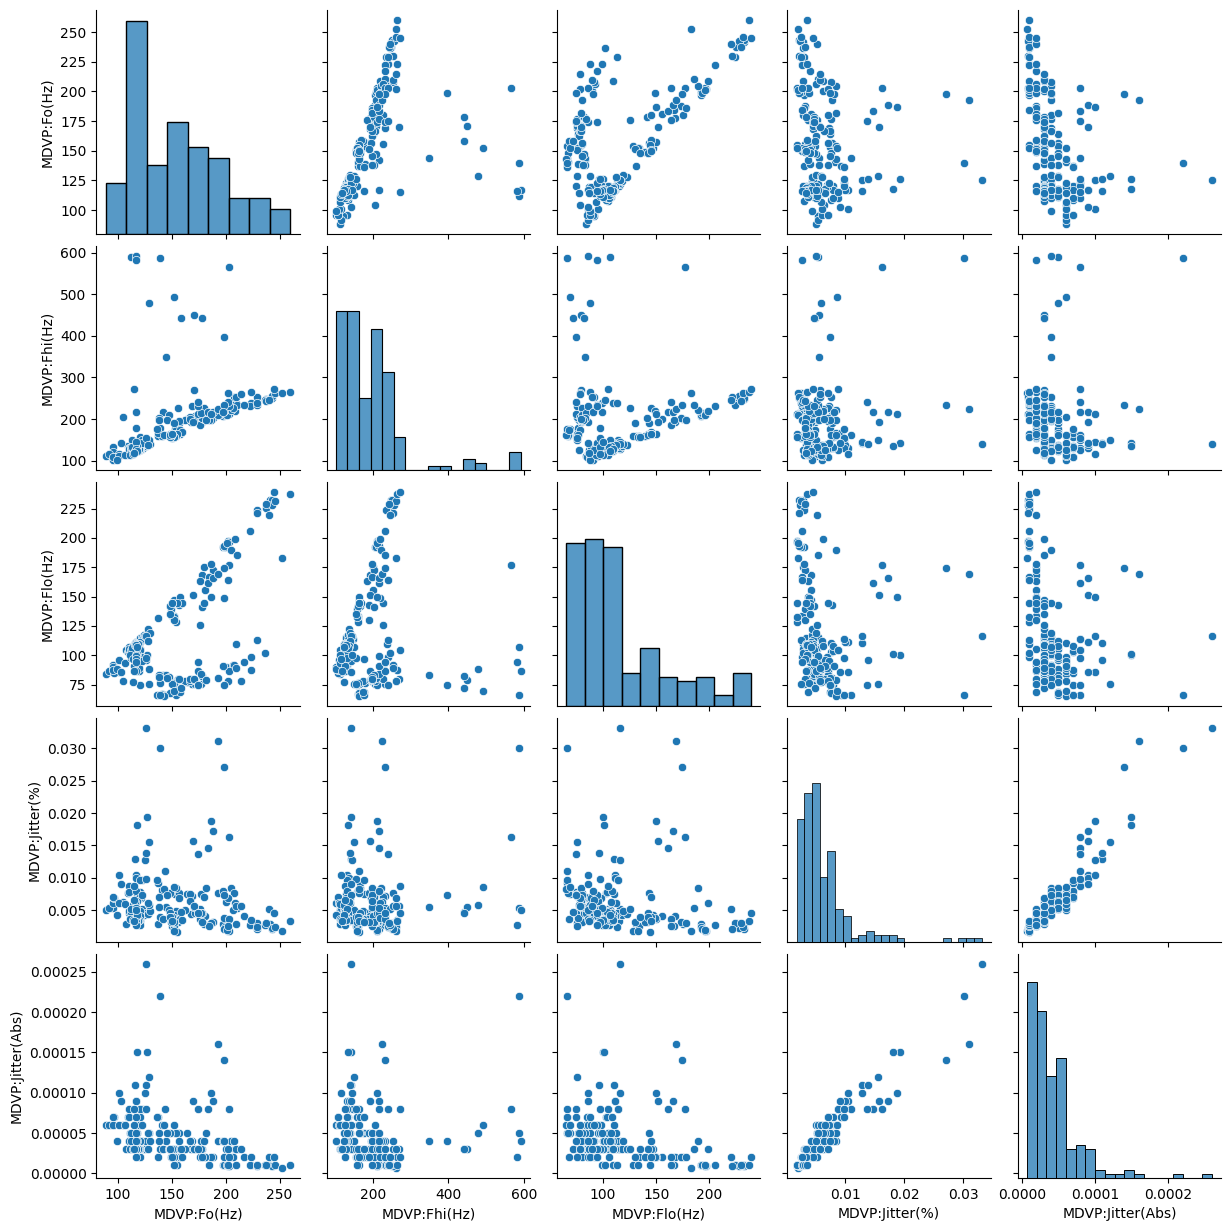

In [9]:
# Plotting pairplot using Seaborn

sns.pairplot(data.iloc[: ,0:6])
plt.show()

In [10]:
FEATURES = [col for col in data.columns if col not in ['name', 'status']]


In [11]:
FEATURES

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [12]:
label = data[['status']]
features = data.drop(columns=['name', 'status'], axis=1)
features.shape, label.shape

((195, 22), (195, 1))

In [13]:
label['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

# Visualization


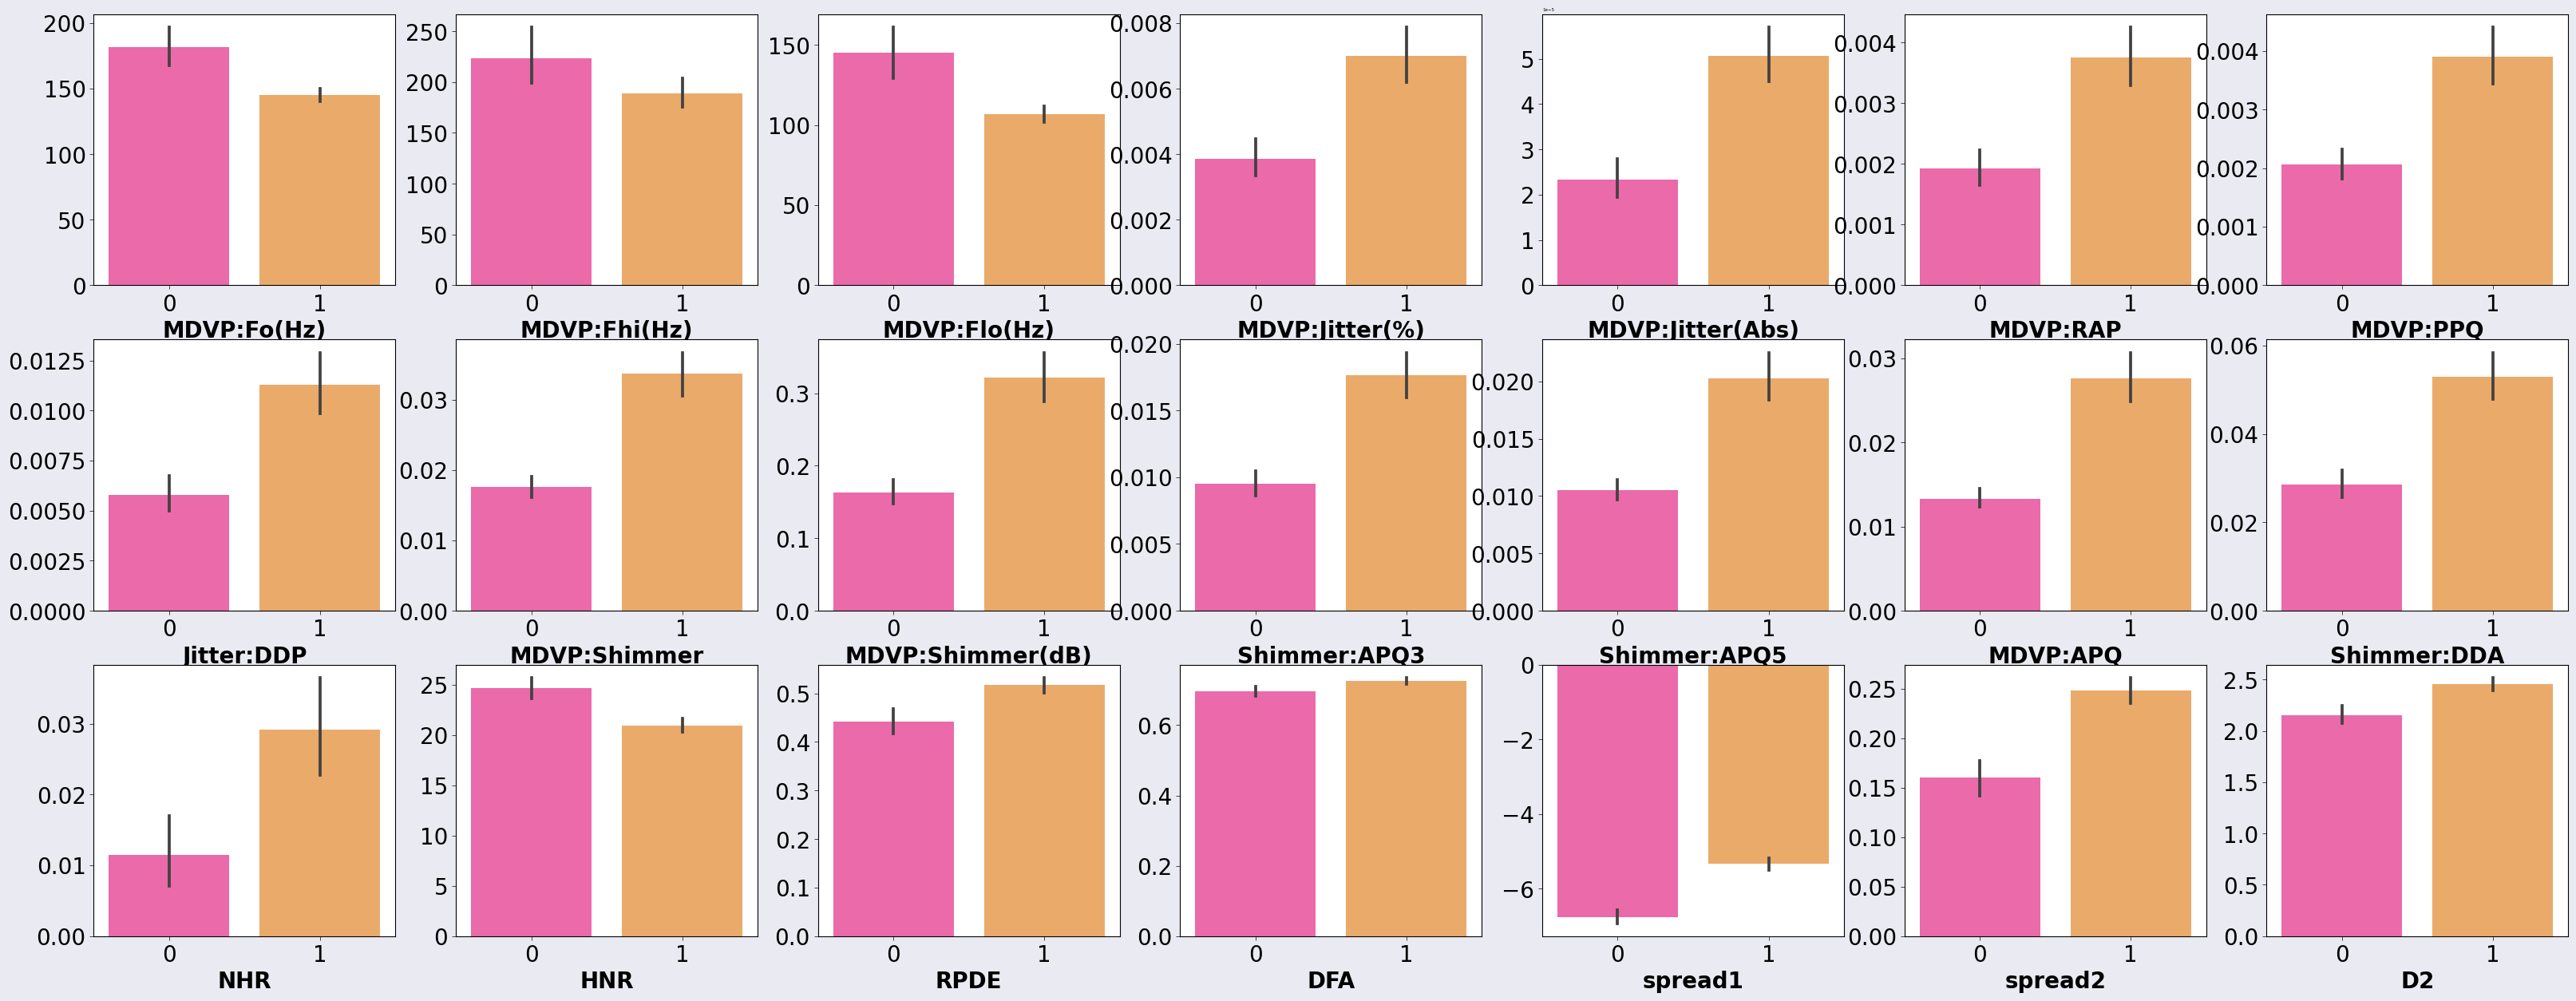

In [14]:
# barplot to all the continous features (target variable status on x-axis, continous features on y-axis)
# 0 -> magenta, 1 -> orange 
ncols = 7
nrows = int(len(FEATURES) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(40, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.barplot(y=data[col], x=data['status'], ax=axes[r, c], palette='spring', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=20, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

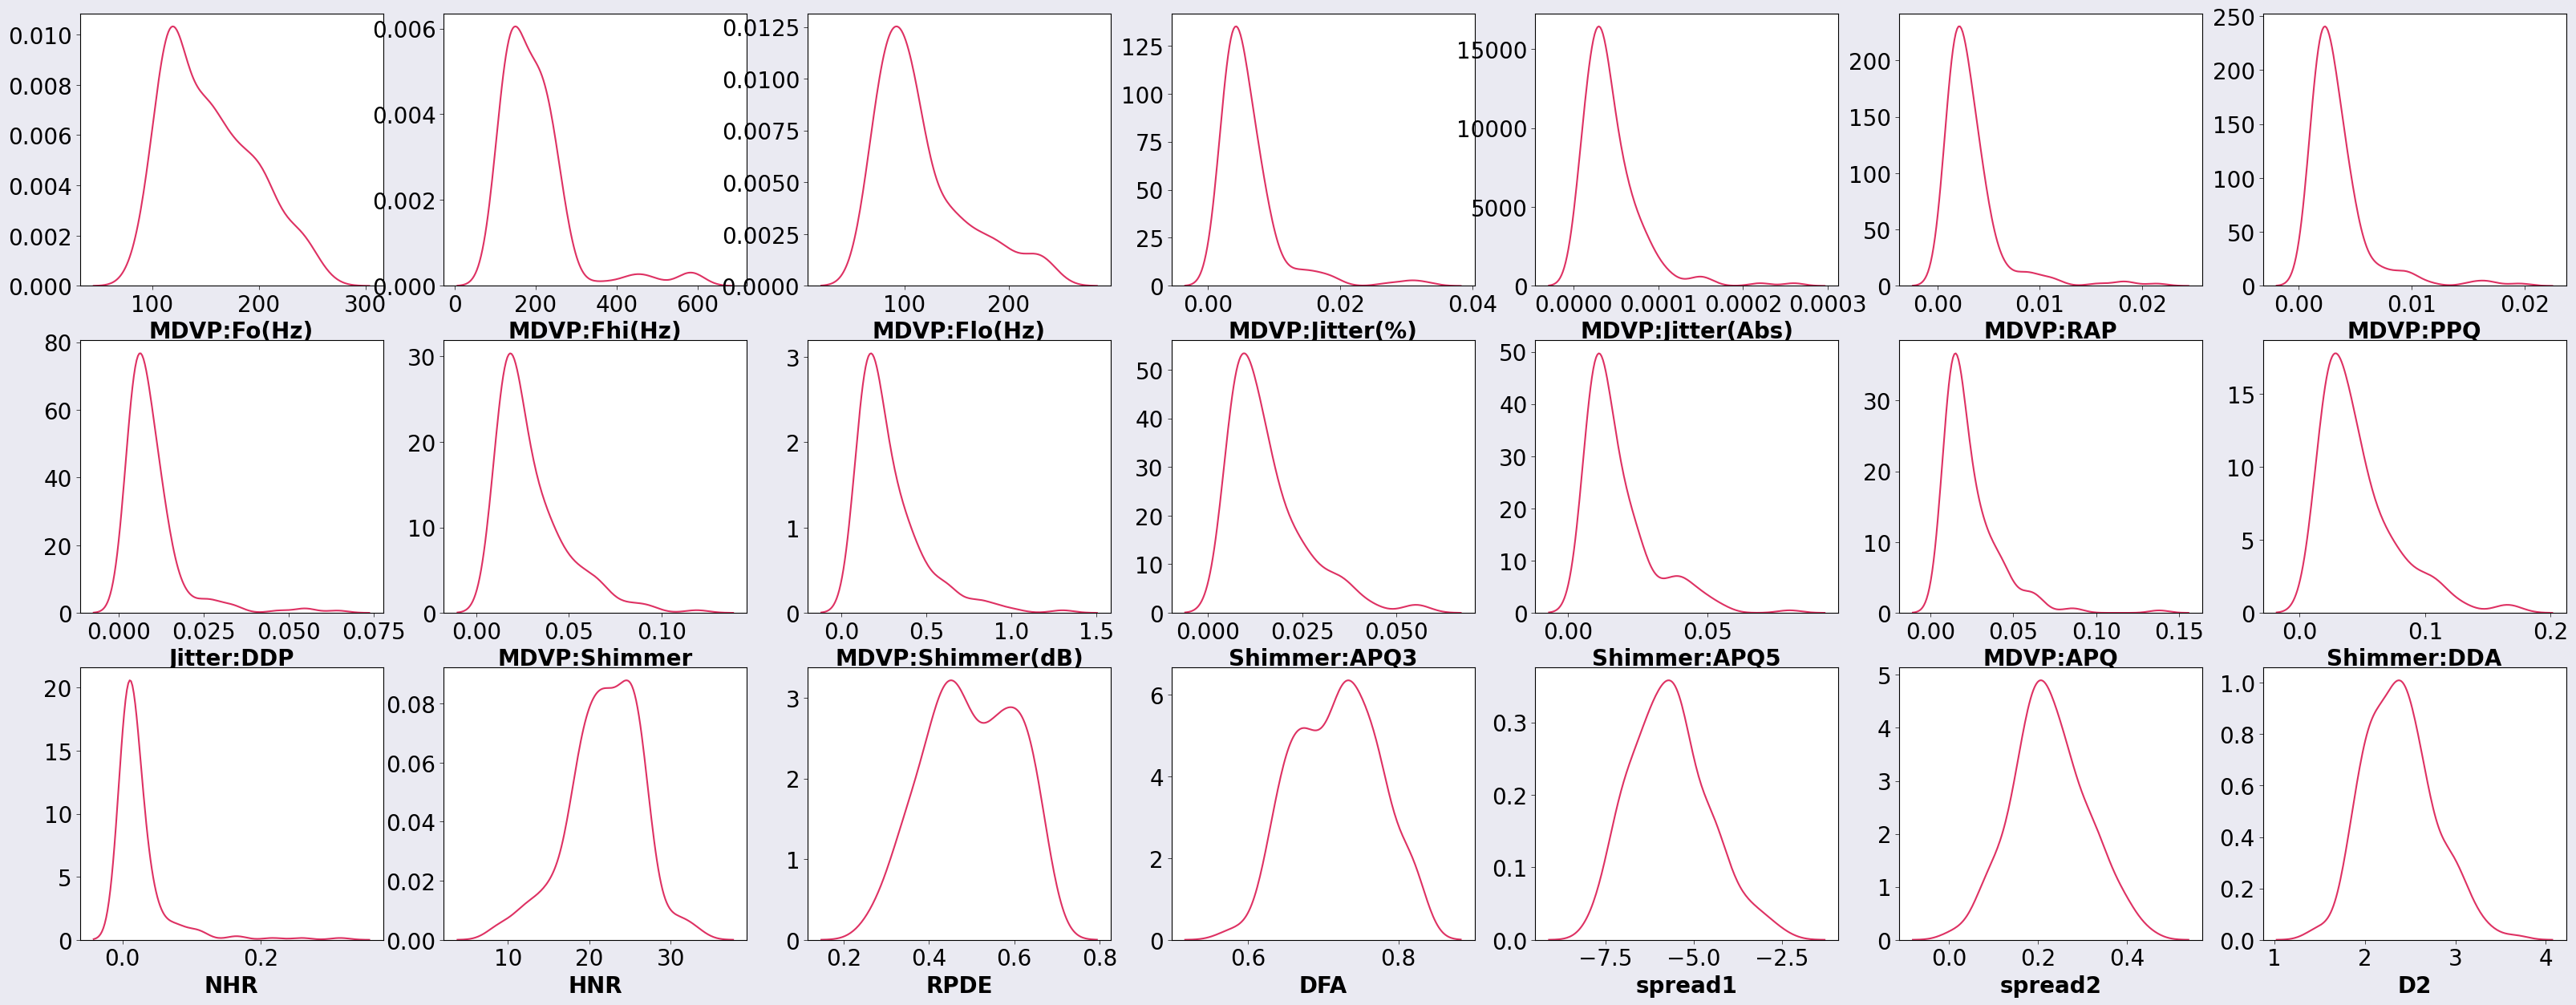

In [ ]:
# Distrbution for all the continous features
ncols = 7
nrows = int(len(FEATURES) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(40, 15), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.kdeplot(x=data[col], ax=axes[r, c], color='#DE3163')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=20, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

In [ ]:
status_df = data.copy()

In [17]:
status_df.status.unique()

array([1, 0])

In [18]:
status_df['status_name'] = status_df.status.apply(lambda x: 'Sick' if x == 1 else 'Healthy')

In [19]:
status_df.status_name.unique()

array(['Sick', 'Healthy'], dtype=object)

In [20]:
status_df.status_name.value_counts()

status_name
Sick       147
Healthy     48
Name: count, dtype: int64

# Distrbution of the target variable

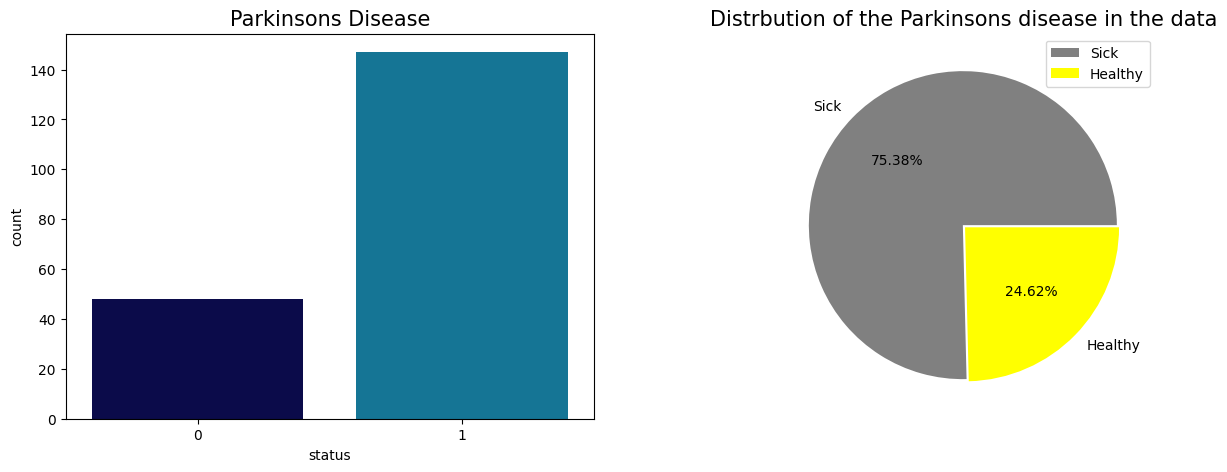

In [21]:
plt.figure(figsize=(15,11))

plt.subplot(2,2,1)
plt.title('Parkinsons Disease', {'fontsize':'15'})
sns.countplot(x='status', data=status_df, palette='ocean');

plt.subplot(2,2,2)
yes = status_df.status[status_df.status_name == 'Sick'].count()
no = status_df.status[status_df.status_name == 'Healthy'].count()
plt.title("Distrbution of the Parkinsons disease in the data", {'fontsize':'15'})
plt.pie([yes, no], labels=['Sick', 'Healthy'], autopct="%.2f%%", explode = [0.01,0.01], colors=['gray', 'yellow'])
plt.legend()
plt.show()

# Feature Engineering

In [22]:
status_df["mean"] = status_df[FEATURES].mean(axis=1)
status_df["std"] = status_df[FEATURES].std(axis=1)
status_df["min"] = status_df[FEATURES].min(axis=1)
status_df["max"] = status_df[FEATURES].max(axis=1)



In [23]:
status_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,DFA,spread1,spread2,D2,PPE,status_name,mean,std,min,max
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.815285,-4.813031,0.266482,2.301442,0.284654,Sick,16.966454,43.042418,-4.813031,157.302
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.819521,-4.075192,0.335590,2.486855,0.368674,Sick,18.422908,45.226961,-4.075192,148.650
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.825288,-4.443179,0.311173,2.342259,0.332634,Sick,17.298610,42.042490,-4.443179,131.111
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.819235,-4.117501,0.334147,2.405554,0.368975,Sick,17.619075,42.897937,-4.117501,137.871
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.823484,-3.747787,0.234513,2.332180,0.410335,Sick,17.705261,43.268903,-3.747787,141.781


In [24]:
status_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', 'status_name', 'mean', 'std', 'min',
       'max'],
      dtype='object')

# Scalling and Assigning Feature and Target variables

In [25]:
scaler = StandardScaler()
# for col in FEATURES:
#     data[col] = scaler.fit_transform(data[col].to_numpy().reshape(-1,1))
    
# X = data[FEATURES].to_numpy()
# y = data['status'].to_numpy()



X = status_df.drop(columns=['name', 'status', 'status_name'], axis=1)
y= status_df[['status']]

In [26]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,RPDE,DFA,spread1,spread2,D2,PPE,mean,std,min,max
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,16.966454,43.042418,-4.813031,157.302
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,18.422908,45.226961,-4.075192,148.650
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,17.298610,42.042490,-4.443179,131.111
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,17.619075,42.897937,-4.117501,137.871
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,17.705261,43.268903,-3.747787,141.781


## Data Scaling standardize

In [27]:
x_scaled = scaler.fit_transform(X)

x_data_re = np.array(x_scaled)


In [28]:
x_data_re, x_data_re.shape

(array([[-0.82929965, -0.43616456, -0.95203729, ..., -0.73799262,
          0.80132308, -0.43616456],
        [-0.77097169, -0.53097409, -0.05772056, ..., -0.6253445 ,
          1.47985265, -0.53097409],
        [-0.90947638, -0.7231683 , -0.10987483, ..., -0.7895549 ,
          1.14144541, -0.7231683 ],
        ...,
        [ 0.49557839,  0.47010361, -0.96839309, ...,  0.27329788,
         -1.01415428,  0.47010361],
        [ 1.07876114,  2.19004398, -0.95417967, ...,  1.83853888,
         -0.97496019,  2.19004398],
        [ 1.45481664,  0.69224632, -0.88348115, ...,  0.69467314,
         -0.03647134,  0.69224632]]),
 (195, 26))

# Spliting the Data into Training and Testing Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_data_re,y, test_size=0.25, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((146, 26), (146, 1), (49, 26), (49, 1))

# Modeling

In [30]:
print(x_data_re.shape, X_train.shape, X_test.shape)

(195, 26) (146, 26) (49, 26)


# Data Standardization

In [31]:
# scaler=StandardScaler()

In [32]:
# scaler.fit(X_train)

In [33]:
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)

# Model Training

Support Vector Machine

In [34]:
model = svm.SVC(kernel='linear')

In [35]:
# training the SVM model with training data
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

# Model Evaluation

In [36]:
# Accuracy Score on training data
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_pred)

In [37]:
print('Accuracy (Training Data) :', training_data_accuracy*100, '%')

Accuracy (Training Data) : 91.0958904109589 %


In [38]:
# Accuracy Score on test data
X_test_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, X_test_pred)

In [39]:
print('Accuracy (Testing Data) :', testing_data_accuracy*100, '%')

Accuracy (Testing Data) : 95.91836734693877 %


# Simple DL model

# Type 1

In [40]:
def model_mlp():
    input_layer = layers.Input(shape=(26,))
    x = layers.Dense(256, activation='relu')(input_layer)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    
    out=  layers.Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=[input_layer], outputs=[out])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    return model

# Type 2

In [41]:
model_2 = keras.models.Sequential([
    layers.Input(shape=(26, )),
    layers.Dense(256, activation='relu'),

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])



In [42]:
model = model_mlp()
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,129 (188.00 KB)

 Trainable params: 48,129 (188.00 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,129 (188.00 KB)

 Trainable params: 48,129 (188.00 KB)

 Non-trainable params: 0 (0.00 B)

# same architecture but written in different way

In [44]:
history = model.fit(X_train, y_train, epochs=20, batch_size=4 ,verbose=1)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6130 - loss: 0.5929
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8810 - loss: 0.3002
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9266 - loss: 0.2139
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9247 - loss: 0.1583
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9445 - loss: 0.1077
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9592 - loss: 0.1058
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0534
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9690 - loss: 0.0686
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9922 - loss: 0.0307
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9788 - loss: 0.0594   
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9970 - loss: 0.0173
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 -

In [45]:
pred_mlp = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [46]:
threshold = 0.5
binary_predictions = (pred_mlp >= threshold).astype(int)

In [47]:
testing_data_accuracy = accuracy_score(y_test, binary_predictions)

In [48]:
print('Accuracy (Testing Data) :', testing_data_accuracy*100, '%')

Accuracy (Testing Data) : 89.79591836734694 %


# Predictive System

**Case 1 : Input Values of Patient having Parkinson, let's see if the model is able to predict or not**

In [49]:
input_data = (95.730,132.068,91.754,0.00551,0.00006,0.00680,0.00802,0.01689,0.00339,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571)

# changing input data to numpy array
input_data_numpy = np.asarray(input_data)

#reshaping the numpy array 
input_data_reshape = input_data_numpy.reshape(1,-1)

#standardizing the input data 
std_data = scaler.transform(input_data_reshape)

## prediction
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The patient has Parkinson')
elif (prediction[0] == 0):
  print('The patient does not have Parkinson')
else:
  print('Some error in processing')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.]]
The patient has Parkinson


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**
Case 2 : Input Values of Patient not having Parkinson, let's see if the model is able to predict or not**

In [51]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,21.812,0.615551,0.773587,-5.498678,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
# changing input data to numpy array
input_data_numpy = np.asarray(input_data)

#reshaping the numpy array 
input_data_reshape = input_data_numpy.reshape(1,-1)

#standardizing the input data 
std_data = scaler.transform(input_data_reshape)

## prediction
prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The patient has Parkinson')
elif (prediction[0] == 0):
  print('The patient does not have Parkinson')
else:
  print('Some error in processing')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.]]
The patient has Parkinson


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
